In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
glass=pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [7]:
glass.shape

(214, 10)

In [8]:
glass.info

<bound method DataFrame.info of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>

In [9]:
glass.describe

<bound method NDFrame.describe of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>

In [10]:
#Data is cleaned and can continue to the Explorary Data Analysis stage
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

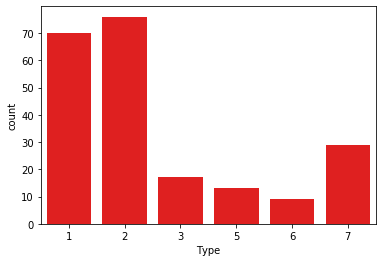

In [11]:
#Univariate analysis Type (Target features).
sns.countplot(glass['Type'], color='red')

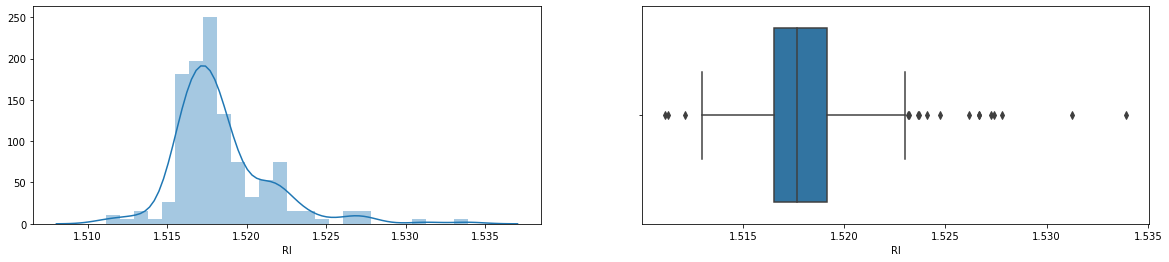

In [12]:
#It can be seen that our data is imbalance because there type 1 and type 2 are very dominant compared to other types.
#Univariate analysis of RI (Refractive Index).
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(glass['RI'])
f.add_subplot(1,2,2)
sns.boxplot(glass['RI']);

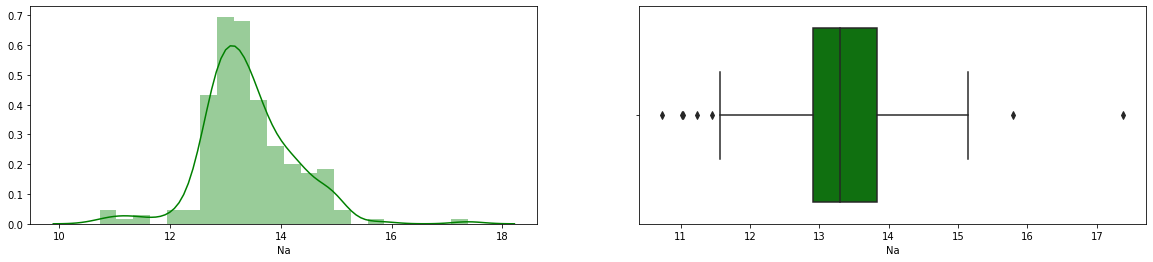

In [14]:
#Univariate analysis Na (Sodium).
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(glass['Na'], color='green')
f.add_subplot(1,2,2)
sns.boxplot(glass['Na'], color='green')

In [15]:
#Correlation between features
glass.corr().style.background_gradient().set_precision(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1,-0.19,-0.12,-0.41,-0.54,-0.29,0.81,-0.00039,0.14,-0.16
Na,-0.19,1,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24,0.5
Mg,-0.12,-0.27,1,-0.48,-0.17,0.0054,-0.44,-0.49,0.083,-0.74
Al,-0.41,0.16,-0.48,1,-0.0055,0.33,-0.26,0.48,-0.074,0.6
Si,-0.54,-0.07,-0.17,-0.0055,1,-0.19,-0.21,-0.1,-0.094,0.15
K,-0.29,-0.27,0.0054,0.33,-0.19,1,-0.32,-0.043,-0.0077,-0.01
Ca,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,1,-0.11,0.12,0.00095
Ba,-0.00039,0.33,-0.49,0.48,-0.1,-0.043,-0.11,1,-0.059,0.58
Fe,0.14,-0.24,0.083,-0.074,-0.094,-0.0077,0.12,-0.059,1,-0.19
Type,-0.16,0.5,-0.74,0.6,0.15,-0.01,0.00095,0.58,-0.19,1


In [16]:
# Create a Naive Bayes object
nb = GaussianNB()
#Create variable x and y.
x = glass.drop(columns=['Type'])
y = glass['Type']
#Split data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model
nb.fit(x_train, y_train)
#Predict testing set
y_pred = nb.predict(x_test)
#Check performance of model
print(accuracy_score(y_test, y_pred))

0.4883720930232558
